# <span style='background:black'><span style='color:Cyan'> <span style='font-family:"Times New Roman"'> Copyright statement: 
#### <span style='font-family:"Times New Roman"'>The initial code was provided by Dr. Sandoval (Assitant professor of Electrical Engineering, New Mexico State University) as a starting point for project. https://web.nmsu.edu/~spsandov/ 
#### <span style='font-family:"Times New Roman"'>The algorithm in current form is developed by Sina Zamen. 

# <span style='background:black'><span style='color:Cyan'> <span style='font-family:"Times New Roman"'> Objective: 
## <span style='font-family:"Times New Roman"'>In this problem, for finding minimum value of a Rosenbrock's cost function, “Gradient Decent” method is implemented.

### <span style='font-family:"Times New Roman"'>Loading Required Modules:

In [1]:
import math
import numpy as np
import sympy as sym
from PIL import Image
from numpy import array
from matplotlib import style
from numpy.linalg import inv
import matplotlib.pyplot as plt
style.use('ggplot')

### <span style='font-family:"Times New Roman"'>Setting up countour map:

In [2]:
HX ,HY  = 50,50 #number of x,y  points for countour
xmin,xmax = -15,15
ymin,ymax = -12,12
x1 = np.linspace(xmin,xmax,HX)
x2 = np.linspace(ymin,ymax,HY)
X1,X2 = np.meshgrid(x1,x2) # genertate mesh grid
w1=sym.Symbol('w1') # define symbols
w2=sym.Symbol('w2')

In [3]:
bowl = 'bowl'
case2= ''
case = bowl #case select
if(case==bowl):
    j=((1-w1)**2 + 100*(w2-w1**2)**2)# define equation
elif(case==case2):
    #define other surfaces here
    pass
else:
    print('case not recognized')

In [4]:
#compute gradient
j_grad1=sym.diff(j,w1)
j_grad2=sym.diff(j,w2)
#compute hessian
hess11=sym.diff(j_grad1,w1)
hess12=sym.diff(j_grad1,w2)
hess21=sym.diff(j_grad2,w1)
hess22=sym.diff(j_grad2,w2)

#generate contour map
ConMap=np.zeros((HX,HY))
for i in range(HX):
    for k in range(HY):
        ConMap[i,k]=j.subs({w1:x1[i],w2:x2[k]})


w=[-0.5,1] # starting point
wStar=[1,1] # ending point
ew=array([7])
jw=array([100])
eta = 0.004 # learning rate
lim=200 # number of iterations
count= 0 
line=[]
h = ew.astype(int)
h = ew[-1:].astype(int)
while (h > 0.05):
    h = ew[-1:].astype(int)
    #compute gradient matrix and hessian matrix
    g= np.array([float(j_grad1.subs({w1:w[0],w2:w[1]})),float(j_grad2.subs({w1:w[0],w2:w[1]}))])
    H= np.array([[float(hess11.subs({w1:w[0],w2:w[1]})),float(hess12.subs({w1:w[0],w2:w[1]}))],                 [float(hess21.subs({w1:w[0],w2:w[1]})),float(hess22.subs({w1:w[0],w2:w[1]}))]])
    
    wnew =  w-eta*g 
    #loop check
    if( count>lim ):
        print('Count Break')
        break
    elif(np.isnan(g).any()):
        print('nan break')
        break
    else:
        count=count +1
        wprev=w.copy()
    
        line.append(w)
        w=wnew.copy()
        
        ew1 = (np.linalg.norm(w-wStar))
        jw1 = (j.subs({w1:w[0],w2:w[1]}))
        ew = np.append(ew, ew1)
        jw = np.append(jw, jw1)
line=np.array(line)

In [5]:
print("Number of Iterations:")
print(count)

Number of Iterations:
3


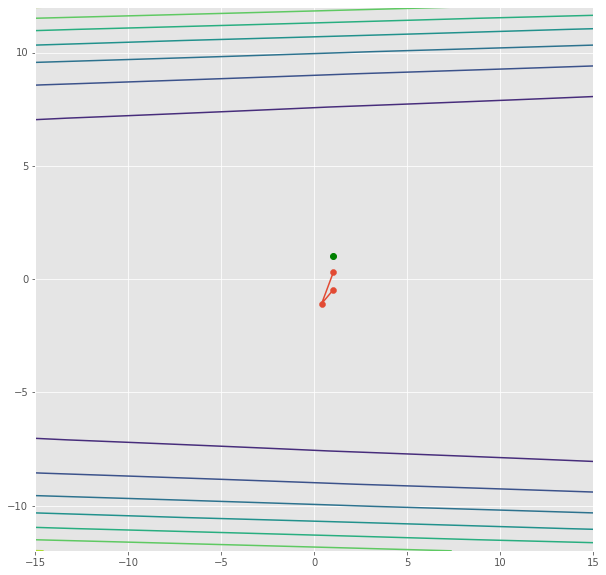

In [6]:
plt.figure(figsize=(10,10))
plt.contour(X1,X2,ConMap)
plt.plot(line[:,1],line[:,0])
plt.scatter(line[:,1],line[:,0])
plt.plot(wStar[1],wStar[0],'go')
plt.show()

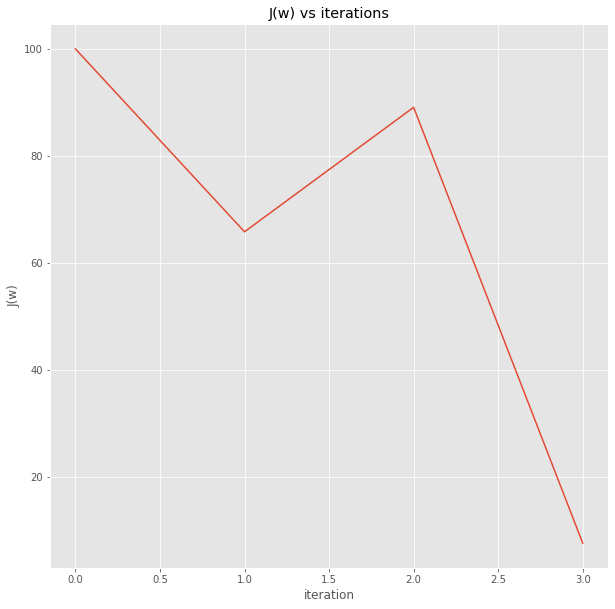

In [7]:
plt.figure(figsize=(10,10))
plt.title('J(w) vs iterations')
plt.ylabel('J(w)')
plt.xlabel('iteration')
plt.plot(range(len(jw)),jw)
plt.show()

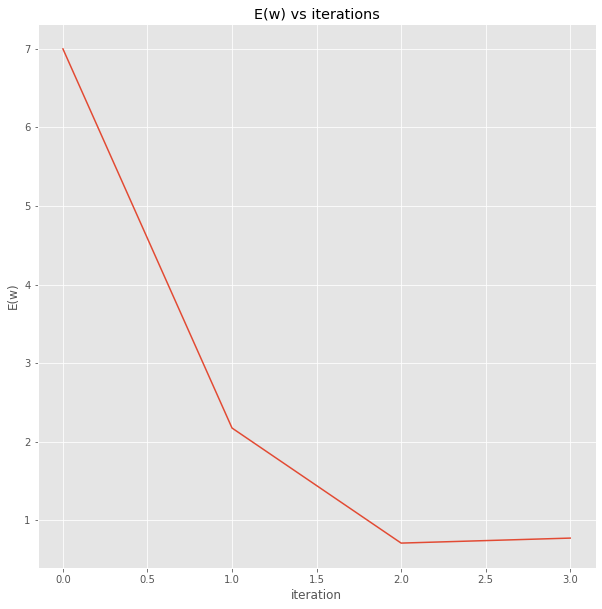

In [8]:
plt.figure(figsize=(10,10))
plt.title('E(w) vs iterations')
plt.ylabel('E(w)')
plt.xlabel('iteration')
plt.plot(range(len(ew)),ew)
plt.show()